# Quiz 4: Python II 
written by Lujain Felemban

##### Reading in the data: import (and install) libraries of choice and read in the data

In [97]:
import pandas as pd #for eda
import numpy as np # for dependencies and stats functions

#import graphing libraries
import matplotlib.pyplot as plt 
import matplotlib as mlp
import seaborn as sns
import plotly.express as px

%matplotlib inline

In [12]:
#only run this cell if you do not have plotly previously installed
#!pip install plotly

     |████████████████████████████████| 26.5 MB 340 kB/s eta 0:00:01


Please clone the following github repo to a local folder. To a new python script, read in the data stored in the file "california.tsv" as a pandas dataframe. You will use this dataset to answer questions on this quiz. 
https://github.com/lujainfl/quiz-eda
The data contains information from the 1990 California (a U.S. state) census. It pertains to the houses found in a given California district and some summary stats about them based on the 1990 census data. The columns names are pretty self-explanatory.
Note: Data here is stored in  a .tsv (Tab Separated Values) format

In [40]:
#read in the data
#note the data here are seperated by tabs, which in regex denoted as "t".
# You could have also found this information from the pandas.read_csv function documentaion or used google

df = pd.read_csv("california.tsv", sep = "t" )

#OR
# df = pd.read_csv("california.tsv", delimiter = "t" )

df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


##### **Q1:** How many columns/features does this dataset have? (Make sure you are not counting the index)

In [100]:
df.shape[1]

10

##### **Q2:** How many rows/observations this dataset has?

In [99]:
df.shape[0]

20640

##### **Q3:** What is the median house value of the house/district located at row index #19000

In [102]:
df.iloc[19000].median_house_value

140100.0

##### **Q4:** How many categorical variables this dataset have?

In [107]:
df.info()
#answer here is 1 and it is the (ocean_proximity). All other variables are numerical.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20639 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


##### **Q5:** How many observations have ocean_proximity value of "<1H OCEAN". Please provide your numerical answer in percentage out of total #observations.

In [112]:
round((df[df.ocean_proximity == "<1H OCEAN"].shape[0])/(df.shape[0])*100, 2)

44.26

##### **Q6:** How many total missing values does this dataset have?

In [119]:
df.isnull().sum().sum()

208

##### **Q7:** Which columns have missing values?

In [120]:
df.isnull().sum()
# answer is "total_bedrooms " AND "ocean_proximity"

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         1
dtype: int64

In [129]:
df.isnull().any()

longitude             False
latitude              False
housing_median_age    False
total_rooms           False
total_bedrooms         True
population            False
households            False
median_income         False
median_house_value    False
ocean_proximity        True
dtype: bool

##### **Q9:** How many observations have null values in two or more columns (provide your answer in terms of percentage of total observations)

In [136]:
#  Teh question here is asking about observations/rows that have at least TWO null values.
#  As in rows with empty values in two or  more different varaibeles/columns. 

# since we only have null values in two columns, we can check using filtering
df[(df.ocean_proximity.isnull()) & (df.total_bedrooms.isnull())].shape[0]

0

In [ ]:
#can you think of other ways to check without knowing which columns have null values?

##### **Q10:** What is the index (row number) of the observation with null value in ocean_proximity column.

In [143]:
df[df.ocean_proximity.isnull()].index

Int64Index([3449], dtype='int64')

##### **Q11:** How many observations have value of more than 50 in the housing median age column? Hint. you can use basic methods for subsetting/parsing/filtering dataframes

In [145]:
df[df.housing_median_age > 50].shape[0]

1321

##### **Q12:** How many observations have housing median age value of over 50 AND ocean_proximity of "NEAR BAY"?

In [150]:
df[(df.housing_median_age > 50) & (df.ocean_proximity == "NEAR BAY")].shape[0]

641

##### **Q13:** What is the mean of housing_median_value column?

In [151]:
#here the question is asking about the median house value column.
np.mean(df.median_house_value.to_list()).round()

206856.0


##### **Q14**: Using your python library of choice, reproduce the following data viz. Copy and paste your code in the answer box.

![<>](hist.png)

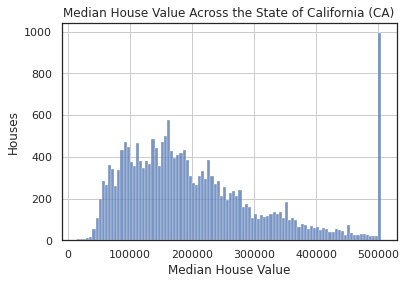

In [66]:
fig_2 = sns.histplot(data = df, x = 'median_house_value', binwidth=5000)
fig_2.grid()
fig_2.set(xlabel='Median House Value', ylabel = 'Houses')
fig_2.set_title('Median House Value Across the State of California (CA)');

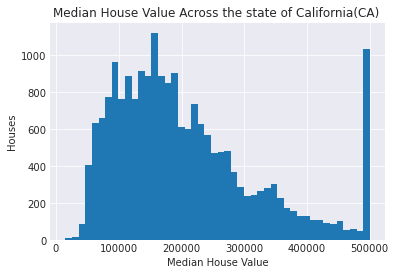

In [53]:
plt.hist(df.median_house_value, bins='auto')
plt.title("Median House Value Across the state of California(CA) ")
plt.xlabel("Median House Value")
plt.ylabel("Houses")
plt.show()



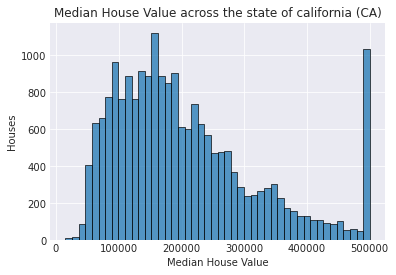

In [59]:
sns.histplot(x='median_house_value',data=df)
plt.title("Median House Value across the state of california (CA)")
plt.xlabel("Median House Value")
plt.ylabel("Houses");

In [55]:
house_median=df['median_house_value']
fig = px.histogram(house_median,title="Median Houses Values Across the State of California (CA)")
fig.update_layout(
    xaxis_title="median_house_value",
    yaxis_title="Houses"
    )
fig.show()

Text(0, 0.5, 'Houses')

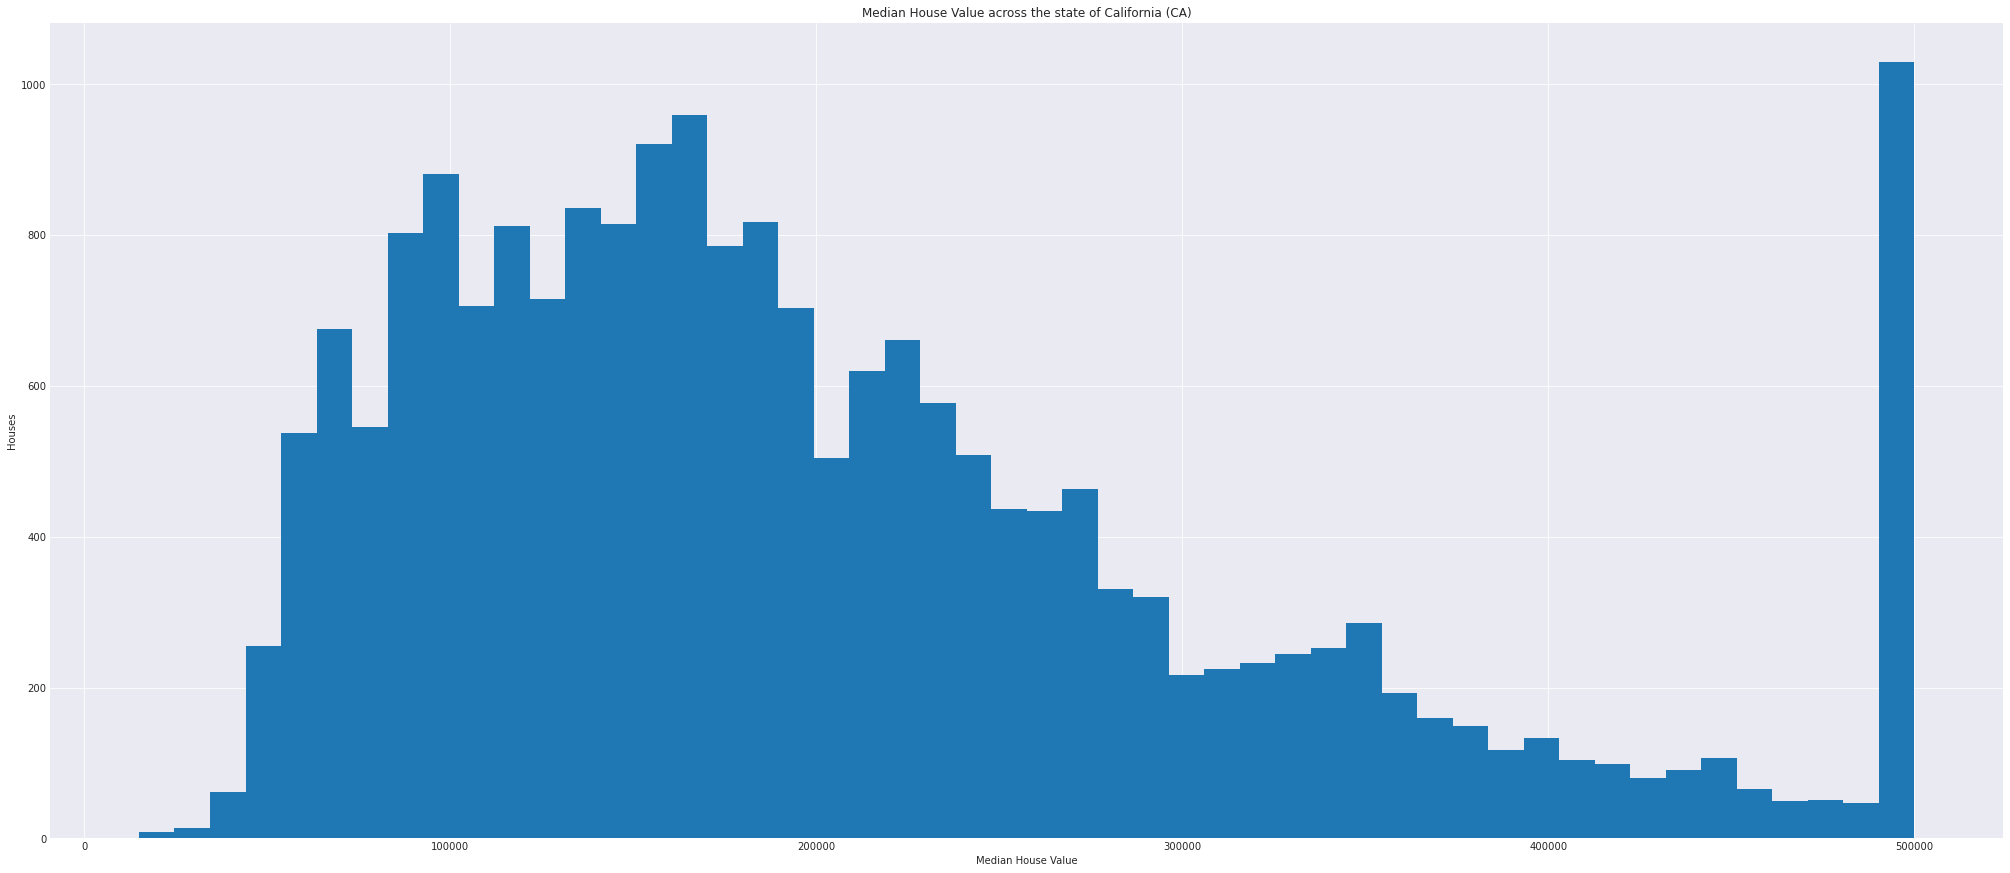

In [56]:
df.median_house_value.hist(bins=50, figsize=(35,15))
plt.title('Median House Value across the state of California (CA)')
plt.xlabel("Median House Value")
plt.ylabel('Houses')

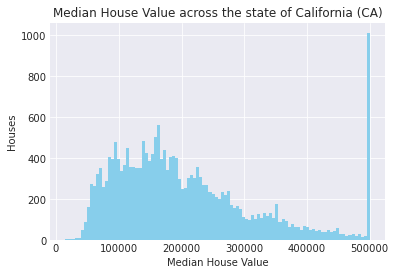

In [60]:
plt.hist(df.median_house_value, 100, color="skyBlue")
plt.xlabel("Median House Value")
plt.ylabel("Houses")
plt.title("Median House Value across the state of California (CA)")

plt.show()

##### **Q15**: Using your python library of choice, reproduce the following data viz. Copy and paste your code in the answer box.

Note: actual values might be different in your dataset 

![<>](bar.png)

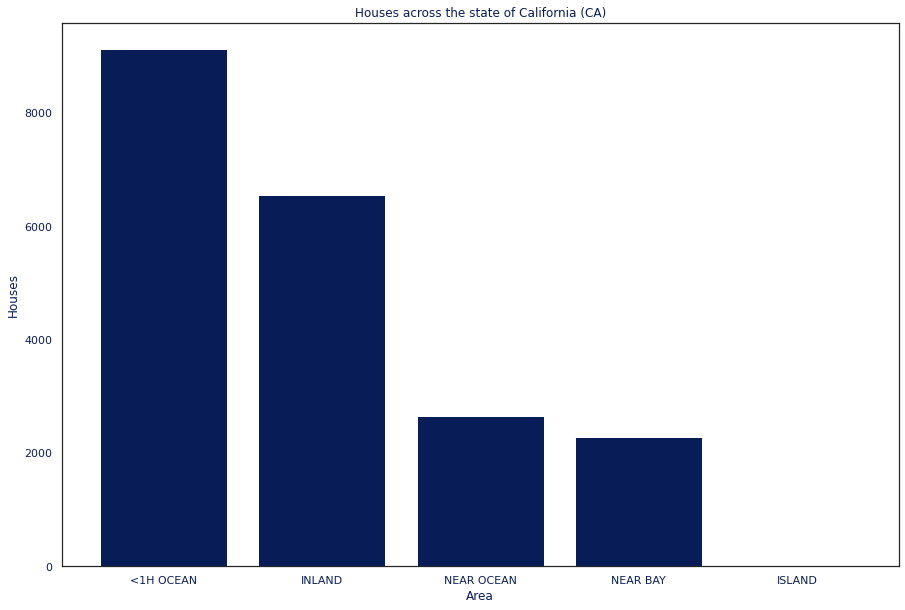

In [69]:
x = df['ocean_proximity'].value_counts().index
y = df['ocean_proximity'].value_counts()
plt.figure(figsize=(15,10))
plt.xticks( color ='#081d58')
plt.yticks(color ='#081d58')
plt.bar(x, y, color= ('#081d58'))

plt.title('Houses across the state of California (CA)', color ='#081d58')
plt.xlabel('Area', color ='#081d58')
plt.ylabel('Houses', color ='#081d58');

In [71]:
grouped = pd.DataFrame(df.ocean_proximity.value_counts())
grouped['area'] = grouped.index
# grouped.columns
# grouped
fig = px.bar(grouped, x = 'area', y='ocean_proximity', text='ocean_proximity' ,
title = 'Houses across the state of California (CA)',
labels = {'ocean_proximity' : 'Houses',
'area' : 'Area'})

fig.show()

Text(0, 0.5, 'Houses')

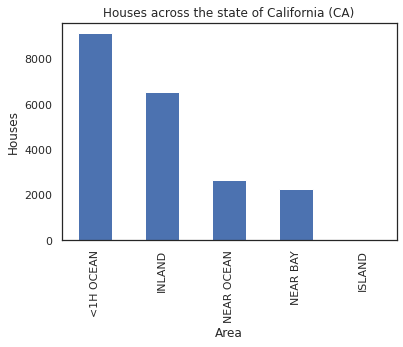

In [74]:
ocean_proximity_cout = df.ocean_proximity.value_counts()

ocean_proximity_cout.plot.bar(x='ocean_proximity')
plt.title(('Houses across the state of California (CA)'))
plt.xlabel("Area")
plt.ylabel('Houses')

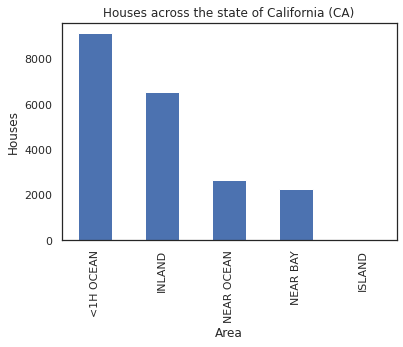

In [77]:
df.ocean_proximity.value_counts().plot(kind='bar')
plt.title(('Houses across the state of California (CA)'))
plt.xlabel("Area")
plt.ylabel('Houses');

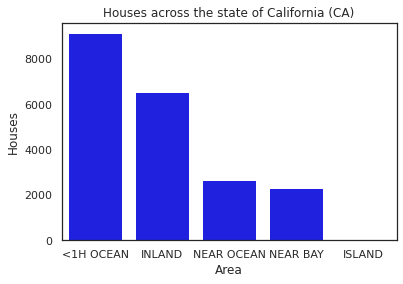

In [79]:
sns.countplot(x = 'ocean_proximity' , data = df, color = 'blue',
         order=df['ocean_proximity'].value_counts().index).set(title='Houses across the state of California (CA)', 
         xlabel='Area', ylabel='Houses');


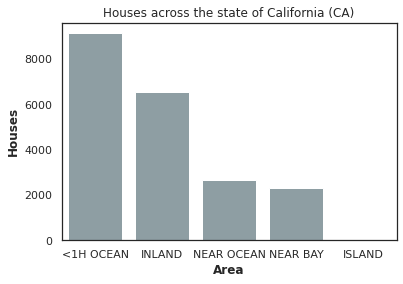

In [81]:
plot=sns.countplot(x=df['ocean_proximity'], order=df['ocean_proximity'].value_counts().index,color="c", saturation=0.2)
plot.set_xlabel("Area",weight="bold")
plot.set_ylabel("Houses", weight="bold")
plot.set_title("Houses across the state of California (CA)");

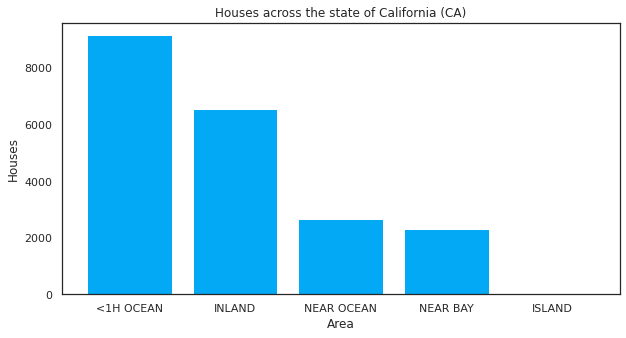

In [82]:
plot1 = df["ocean_proximity"].value_counts().to_frame()
Houses = list(plot1.index)
Area = list(plot1.ocean_proximity)
fig = plt.figure(figsize = (10, 5))
plt.bar(Houses, Area, color ='#03a9f4')
plt.xlabel("Area")
plt.ylabel("Houses")
plt.title("Houses across the state of California (CA)")
plt.show()


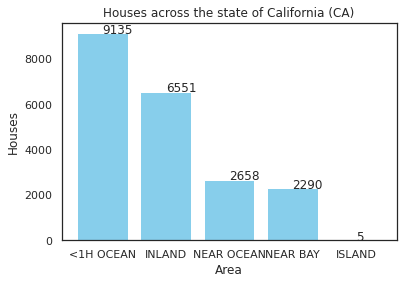

In [83]:
plt.bar(df.ocean_proximity.value_counts().index, df.ocean_proximity.value_counts(), color="skyBlue", )
plt.xlabel("Area")
plt.ylabel("Houses")
plt.title("Houses across the state of California (CA)")

for index, value in enumerate(df.ocean_proximity.value_counts()):
    plt.text(index, value, str(value))
plt.show()

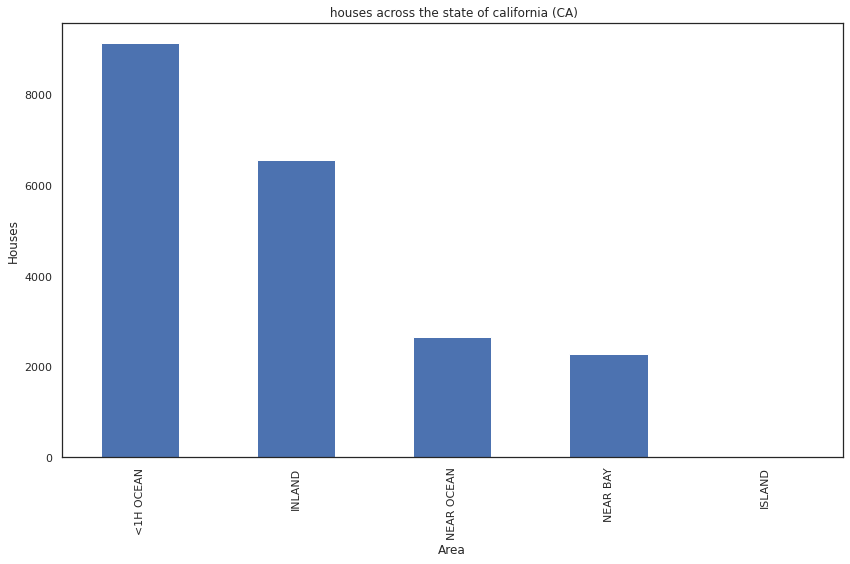

In [84]:
ax = df['ocean_proximity'].value_counts().plot(kind='bar',
                                    figsize=(14,8),
                                    title=" houses across the state of california (CA)")
ax.set_xlabel("Area")
ax.set_ylabel("Houses")
plt.show()


[<here show something>](hist.png)